In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [5]:
nyc_data=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False)

In [6]:
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [7]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [8]:
nyc_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
import datetime

In [131]:
nyc_data['Created Date']= pd.to_datetime( nyc_data['Created Date'])
nyc_data['Closed Date']= pd.to_datetime( nyc_data['Closed Date'])
nyc_data=nyc_data[nyc_data['Closed Date'] >= nyc_data['Created Date']]
nyc_data['Request_Closing_Time']=nyc_data['Closed Date']-nyc_data['Created Date']

C:\Users\Naina\AppData\Local\Temp/ipykernel_32984/2501819126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_data['Request_Closing_Time']=nyc_data['Closed Date']-nyc_data['Created Date']


In [132]:
nyc_data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request Closing time,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,0 days 03:27:02


In [133]:
nyc_data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [134]:
new_nyc_data= nyc_data[['Agency', 'Agency Name','Complaint Type', 'Descriptor','City','Status','Borough','Request_Closing_Time']]

In [135]:
new_nyc_data

,Agency,Agency Name,Complaint Type,Descriptor,City,Status,Borough,Request_Closing_Time
0,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,NEW YORK,Closed,MANHATTAN,0 days 00:55:15
1,NYPD,New York City Police Department,Blocked Driveway,No Access,ASTORIA,Closed,QUEENS,0 days 01:26:16
2,NYPD,New York City Police Department,Blocked Driveway,No Access,BRONX,Closed,BRONX,0 days 04:51:31
3,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,BRONX,Closed,BRONX,0 days 07:45:14
4,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,ELMHURST,Closed,QUEENS,0 days 03:27:02
...,...,...,...,...,...,...,...,...
300692,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,NEW YORK,Closed,MANHATTAN,0 days 00:38:29
300694,NYPD,New York City Police Department,Blocked Driveway,Partial Access,RICHMOND HILL,Closed,QUEENS,0 days 02:00:31
300695,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,Closed,BROOKLYN,0 days 03:07:17
300696,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BRONX,Closed,BRONX,0 days 04:05:33


In [136]:
new_nyc_data.isnull().sum()

Agency                     0
Agency Name                0
Complaint Type             0
Descriptor              5909
City                     506
Status                     0
Borough                    0
Request_Closing_Time       0
dtype: int64

In [137]:
new_nyc_data['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [138]:
new_nyc_data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Agency Issues', 'Squeegee', 'Animal in a Park'], dtype=object)

In [139]:
status_value=new_nyc_data['Status'].value_counts()
status_value

Closed      298471
Open            36
Assigned        26
Draft            1
Name: Status, dtype: int64

<AxesSubplot:>

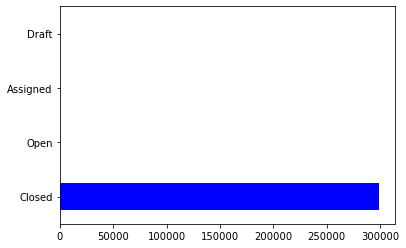

In [140]:
new_nyc_data['Status'].value_counts().plot(kind='barh', color='blue', alpha=1)

<AxesSubplot:>

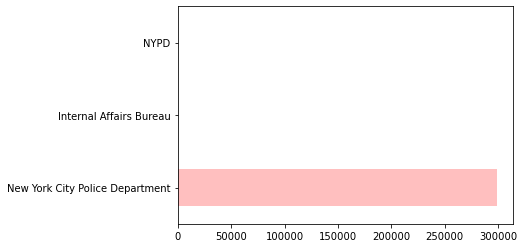

In [141]:
new_nyc_data['Agency Name'].value_counts().plot(kind='barh', color='red', alpha=.25)

In [142]:
new_nyc_data=new_nyc_data[new_nyc_data['Request_Closing_Time'].notnull()]

In [143]:
new_nyc_data.isnull().sum()

Agency                     0
Agency Name                0
Complaint Type             0
Descriptor              5909
City                     506
Status                     0
Borough                    0
Request_Closing_Time       0
dtype: int64

In [146]:
comp_type= new_nyc_data.dropna(subset=['Complaint Type'])
comp_type_group=comp_type.groupby('Complaint Type')
comp_type.groupby('Complaint Type').size().sort_values(ascending=False)

Complaint Type
Blocked Driveway             76810
Illegal Parking              74532
Noise - Street/Sidewalk      48076
Noise - Commercial           35247
Derelict Vehicle             17588
Noise - Vehicle              17033
Animal Abuse                  7768
Traffic                       4496
Homeless Encampment           4416
Noise - Park                  4022
Vending                       3795
Drinking                      1275
Noise - House of Worship       929
Posting Advertisement          648
Urinating in Public            592
Bike/Roller/Skate Chronic      424
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Animal in a Park                 1
dtype: int64

<AxesSubplot:xlabel='Complaint Type'>

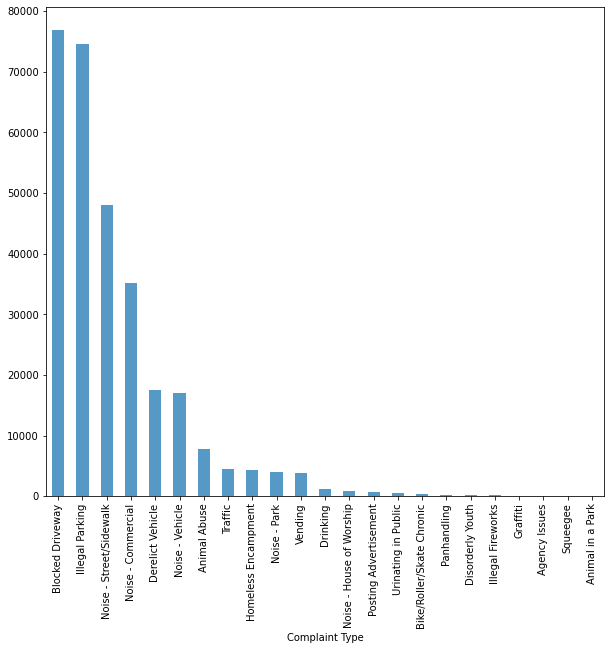

In [218]:
comp_type.groupby('Complaint Type').size().sort_values(ascending=False).plot(kind='bar', alpha=.75, figsize=(10,9))

<AxesSubplot:ylabel='City'>

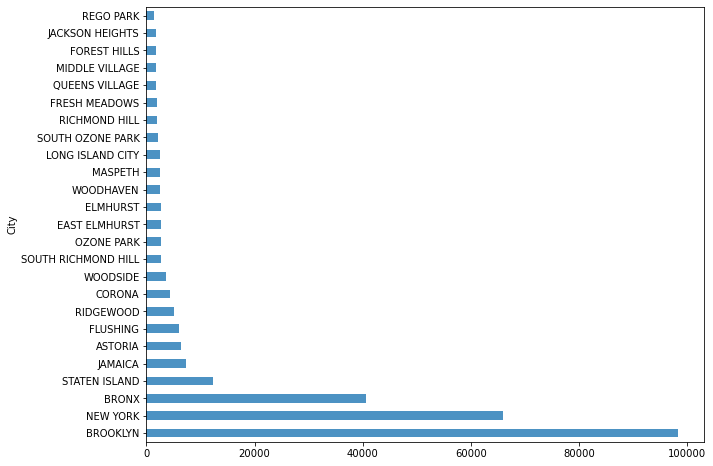

In [229]:
block_drive_city=new_nyc_data.groupby('City')
block_drive_city.size().sort_values(ascending=False).head(25).plot(kind='barh',figsize=(10,8), alpha=.80)

## Brooklyn ,New York and Bronx are top three cities from which complaints are coming

In [230]:
borough=new_nyc_data.groupby('Borough')
borough.size().sort_values(ascending=False)

Borough
BROOKLYN         98295
QUEENS           80629
MANHATTAN        66109
BRONX            40697
STATEN ISLAND    12338
Unspecified        466
dtype: int64

In [210]:
brooklyn=borough.get_group('BROOKLYN')
brooklyn.head()

,Agency,Agency Name,Complaint Type,Descriptor,City,Status,Borough,Request_Closing_Time,Month
5,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,BROOKLYN,Closed,BROOKLYN,0 days 01:53:30,12
9,NYPD,New York City Police Department,Blocked Driveway,No Access,BROOKLYN,Closed,BROOKLYN,0 days 01:23:02,12
13,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,BROOKLYN,Closed,BROOKLYN,0 days 08:30:02,12
17,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,Closed,BROOKLYN,0 days 00:51:08,12
18,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,Closed,BROOKLYN,0 days 02:56:01,12


In [266]:
time_group=comp_type.groupby('Complaint Type')
time_group.mean().sort_values(ascending=False, by='Request_Closing_Time')

C:\Users\Naina\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Request_Closing_Time
Complaint Type,
Animal in a Park,14 days 00:50:05
Derelict Vehicle,0 days 07:21:50.902717762
Graffiti,0 days 07:09:04.504424778
Agency Issues,0 days 05:15:37.166666666
Animal Abuse,0 days 05:12:47.677780638
Blocked Driveway,0 days 04:44:27.258638198
Illegal Parking,0 days 04:30:04.145454301
Panhandling,0 days 04:22:21.963934426
Homeless Encampment,0 days 04:21:56.052536231


<AxesSubplot:>

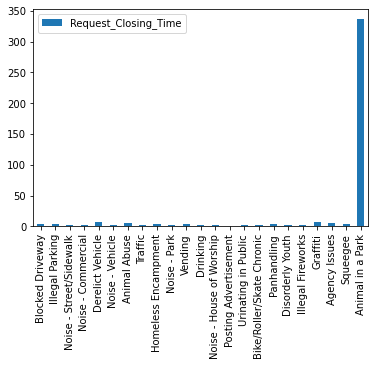

In [265]:
freq = new_nyc_data['Complaint Type'].value_counts().sort_values(ascending=False)
var = var.loc[freq.index]
var.head(30).plot(kind='bar')

 as we can see Animal in park took longest time to resolve followed by the derelict vehicle and least time is taken for posting advertisment complaint

<AxesSubplot:title={'center':'Location Type vs complaints'}>

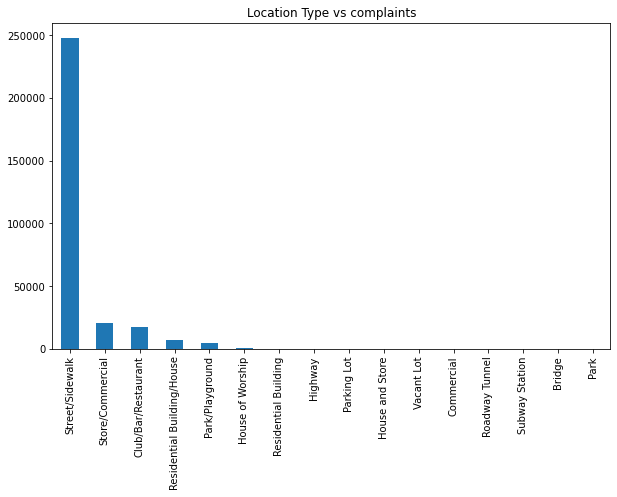

In [201]:
#location type vs complaint
(nyc_data['Location Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6), title='Location Type vs complaints')

### As we can see , street/sidewalk location are the most recorded complaints, which is understandble since Blocked driveway is highest type of complaint recorded. From previous chart we can conclued that Brooklyn, New York and Bronx are the cities with most complaints. Blocked driveway complaints can be attributed to illegal parking on street which in turn increases the complaint aboit noise coming from streets and sidewalks

<AxesSubplot:title={'center':'Volume of complaints by month'}>

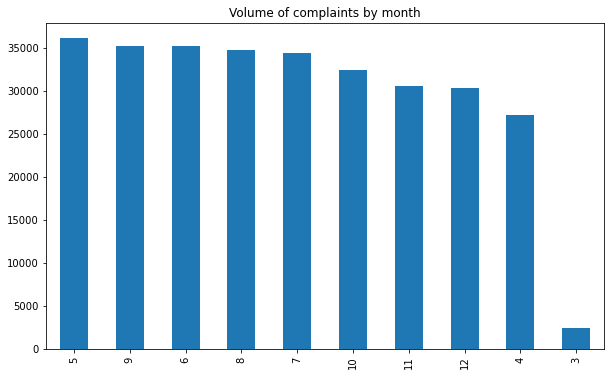

In [203]:
new_nyc_data['Month']=nyc_data['Created Date'].dt.month

<AxesSubplot:title={'center':'Volume of Blocked driveway complaint by months'}>

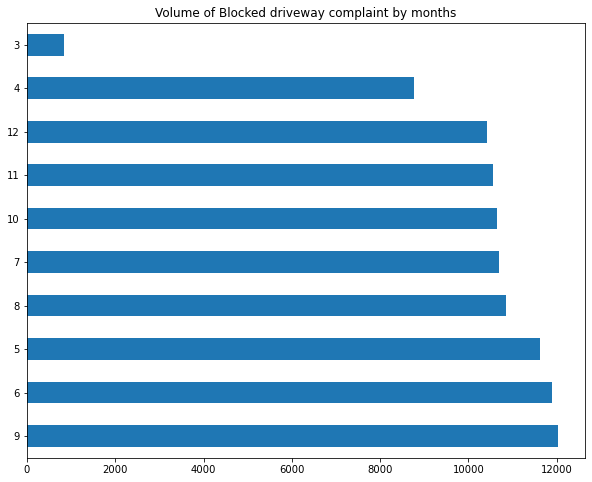

In [209]:
#checking blocked driveway complaint in Brooklyn by month
Brooklyn_data=new_nyc_data[new_nyc_data['City']=='BROOKLYN']
Brooklyn_data['Month'].value_counts().plot(kind='barh', figsize=(10,8), title="Volume of Blocked driveway complaint by months")

### September and June is the month is which these complaints are filed most and March is when it is least

# Conclusions
### by analyzing this data, we come to the conclusion that:
1. Blocked driveway is most filed complaint followed by illegal parking and which in turn increases complaint related to noise coming from sidewalks and streets.
2.Major cities like Brooklyn, New York and Bronx face this issuse severely specially in month of September and June and least in March.
3.Maximum time to resolve a issue was 14 days that to solve animal in park complaint , it might be cause animal in park is the lowest files case. Least time to resolve the case was 1hour 58 min i.e. solving posting advertisment complaint. It might be cause posting advertisment is mostly based on street and sidewalks complaints where majority of cases are located
4.Location types that saw majority complaints are based in major cities that too mostly Street/sidewalk as we can see most of the complaints are about blocked driveway , illegal parking and noise coming from street and sidewalks . So we can conclude that location type and complaints filed are highly correlated.